### Figure 8
Timeseries of ocean temperature in Disko Bay, sampled at a depth of 240 m.

In [1]:
# IMPORT MODULES 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np 
import datetime

In [2]:
# OPEN THE ALAMO DATA (F9250 & F9313), EXTRACTED AT A DEPTH OF 240m 
ALAMO_F9250 = pd.read_csv('R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/omg_alamo_F9250/ALAMO_F9250_240m.csv')
ALAMO_F9313 = pd.read_csv('R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/omg_alamo_F9313/ALAMO_F9313_240m.csv')

# DEFINE THE DATE AND TEMPERATURE VARIABLES FOR EACH DATASET
ALAMO_F9250_DATE = pd.to_datetime(ALAMO_F9250['date'], dayfirst=True)
ALAMO_F9250_TEMP = ALAMO_F9250['temperature']
ALAMO_F9313_DATE = pd.to_datetime(ALAMO_F9313['date'], dayfirst=True)
ALAMO_F9313_TEMP = ALAMO_F9313['temperature']

In [3]:
# OPEN THE APEX F1984 DATA, EXTRACTED AT A DEPTH OF 240m 
APEX_F9184_DATA = pd.read_csv('R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/omg_apex_f9184/OMG_APEX_F9184_240m_1m.csv')
APEX_F9184_DATE = pd.to_datetime(APEX_F9184_DATA['TIME'], format='%Y%m%dT%H%M%S')
APEX_F9184_TEMP = APEX_F9184_DATA['TEMP']

In [4]:
# OPEN THE GEM DATA, EXTRACTED AT A DEPTH OF 240m
GEM_DATA = pd.read_csv('R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/gem_ctd_disko_bay/GEM_240m.csv')
GEM_DATE = pd.to_datetime(GEM_DATA['Date'], format='%Y-%m-%d')
GEM_TEMP = GEM_DATA['Temp (°C)']

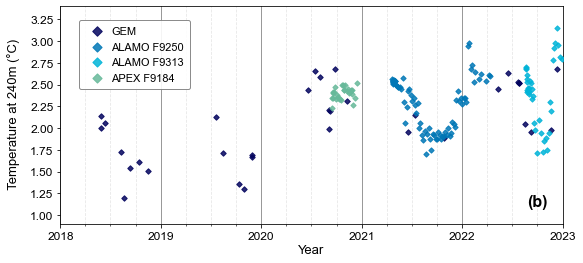

In [6]:
# CREATE A PLOT WITH GRID LINES
plt.rcParams["font.family"] = "Arial"
fig, ax = plt.subplots(figsize=(9, 4))
plt.grid(axis = 'x', alpha=0.5, linestyle='-', color='black')
plt.ylabel(' Temperature at 240m (\u00B0C)', labelpad=10, fontsize=13)
plt.xlabel('Year', labelpad=3, fontsize=13)
plt.grid(True, which='minor', linestyle='--', alpha=0.3)

plt.scatter(GEM_DATE, GEM_TEMP, s=15, marker='D', color='#03045e', alpha=0.85, label='GEM', zorder=20)
plt.scatter(ALAMO_F9250_DATE, ALAMO_F9250_TEMP, color='#0077b6', s=14, marker='D', alpha=0.85, label='ALAMO F9250', zorder=20)
plt.scatter(ALAMO_F9313_DATE, ALAMO_F9313_TEMP, color='#00b4d8', s=14, marker='D', alpha=0.85, label='ALAMO F9313', zorder=20)
plt.scatter(APEX_F9184_DATE, APEX_F9184_TEMP, color='#67b99a', s=14, marker='D', alpha=0.85, label='APEX F9184', zorder=20)

# FORMAT THE Y-AXIS TICK LIMITS  
min_y_value = 1.0
max_y_value = 3.25
interval_y = 0.25
plt.ylim(bottom=min_y_value-0.1, top=max_y_value+0.15)
plt.yticks(np.arange(min_y_value, max_y_value+0.1, interval_y))
minor_locator = ticker.MultipleLocator(base=1)
ax.yaxis.set_minor_locator(minor_locator)
plt.tick_params(axis='y', labelsize=12)

# DEFINE THE FORMATTING FOR THE X-TICKS
year_locator = mdates.YearLocator(base=1, month=1, day=1)
ax.xaxis.set_major_locator(year_locator)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
min_x_value = pd.to_datetime('2018-01-01', format='%Y-%m-%d')
max_x_value = pd.to_datetime('2023-01-01', format='%Y-%m-%d')
plt.xlim(min_x_value, max_x_value)
three_month_intervals = mdates.MonthLocator(interval=3)
ax.xaxis.set_minor_locator(three_month_intervals)
plt.tick_params(axis='x', labelsize=12)

plt.annotate("(b)", xy=(0.93, 0.08), xycoords="axes fraction", fontsize=16, color="black", weight="bold")
legend = plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98), fontsize=11, markerscale=1.75, frameon=True, framealpha=1, handletextpad=0.3, handleheight=0.8, facecolor='white', borderaxespad = 0.8, borderpad=0.6, fancybox=True)
legend.get_frame().set_edgecolor('gray')
legend.get_frame().set_alpha(0.9)

plt.savefig('R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/figures/figure_8.png', dpi=300)
plt.show()